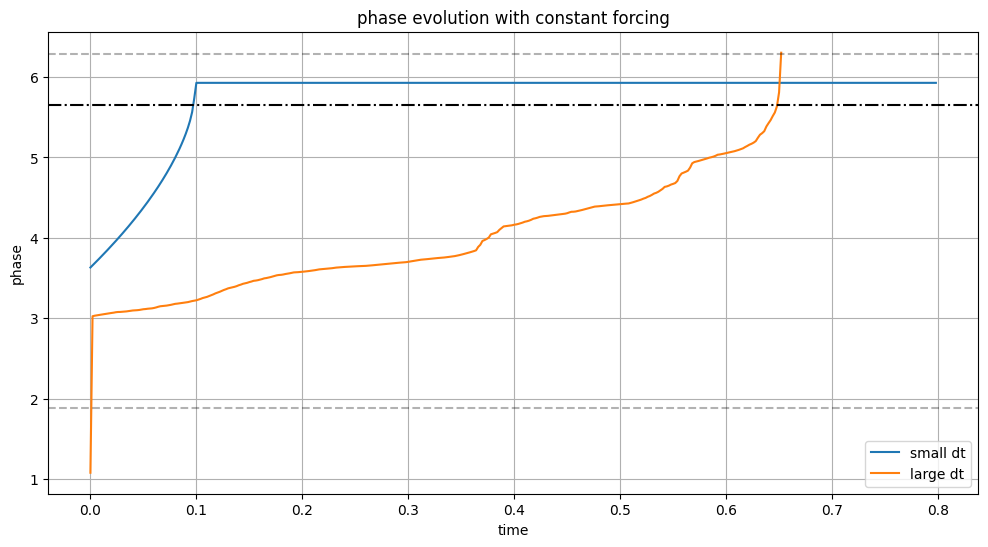

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
# data = pd.read_csv('../../data/emergent_test_one_cilium/20250303/ciliate_1fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
#                    delimiter=' ', 
#                    header=None)

data1 = pd.read_csv('../../data/emergence_constant_forcing_plane_test/20250318/ciliate_1fil_100blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

data = pd.read_csv('../../data/emergence_constant_forcing_plane_test_refined_dt/20250320/ciliate_1fil_100blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 50000
time1 = data1[0] / 500

# Plot both phase variables
plt.figure(figsize=(12, 6))
plt.plot(time[:400], data[2][:400], label='small dt')
plt.plot(time1[:327], data1[2][:327], label='large dt')

# Add horizontal lines at 2π and 2π*0.3
plt.axhline(y=2*np.pi, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=2*np.pi*0.3, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=2*np.pi*0.9, color='black', linestyle='-.')

plt.xlabel('time')
plt.ylabel('phase')
plt.title('phase evolution with constant forcing')
plt.legend()
plt.grid(True)
plt.show()

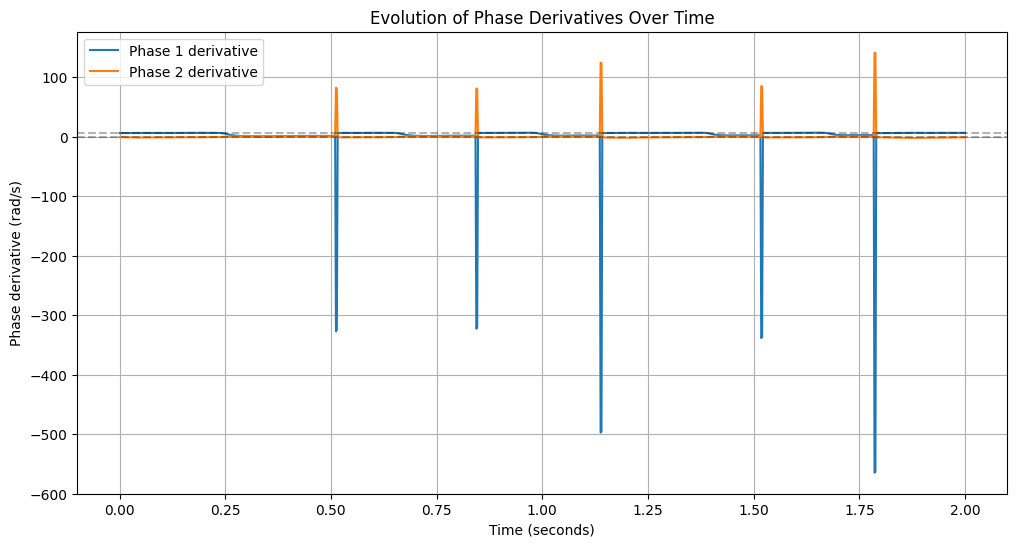

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
data = pd.read_csv('../../data/emergent_test_one_cilium/20250303/ciliate_1fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 500

# Calculate derivatives (multiply by 500 to get per-second rate)
d_phase1 = np.gradient(data[2], time)
d_phase2 = np.gradient(data[3], time)

# Plot derivatives of phase variables
plt.figure(figsize=(12, 6))
plt.plot(time, d_phase1, label='Phase 1 derivative')
plt.plot(time, d_phase2, label='Phase 2 derivative')

# Add horizontal lines at 0 and 2π
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=2*np.pi, color='k', linestyle='--', alpha=0.3)

plt.xlabel('Time (seconds)')
plt.ylabel('Phase derivative (rad/s)')
plt.title('Evolution of Phase Derivatives Over Time')
plt.legend()
plt.grid(True)
plt.show()

First index where phase < 3: 0
At time 0.000s, phase = 2.558


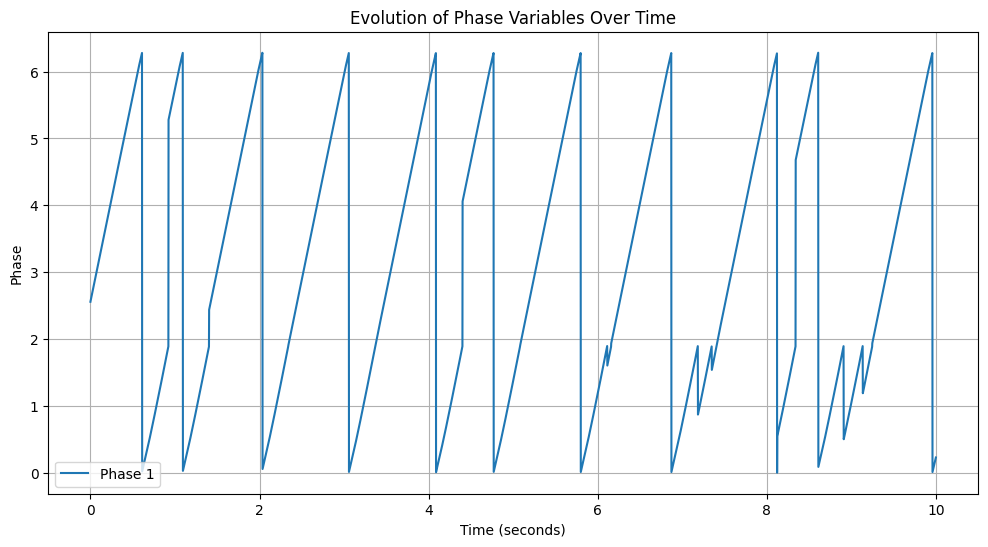

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('../../data/new_beat_avoidance_05_not_01/20250325/ciliate_1fil_100blob_8.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 500
# Find the first index where phase is less than 3
first_low_phase_idx = data[data[2] < 3].index.min()
print(f"First index where phase < 3: {first_low_phase_idx}")

# Get the time at this index
if pd.notna(first_low_phase_idx):
  low_phase_time = time[first_low_phase_idx]
  low_phase_value = data.iloc[first_low_phase_idx, 2]
  print(f"At time {low_phase_time:.3f}s, phase = {low_phase_value:.3f}")

  # Calculate the jump in phase between indices 365 and 366
  phase_365 = data.iloc[365, 2]
  phase_366 = data.iloc[366, 2]
  # phase_jump = phase_365 - phase_366
  # print(f"Phase at index 365: {phase_365:.3f}")
  # print(f"Phase at index 366: {phase_366:.3f}")
  # print(f"Jump in phase: {phase_jump:.3f}")

# Plot both phase variables
plt.figure(figsize=(12, 6))
plt.plot(time, np.mod(data[2], 2*np.pi), label='Phase 1')
# plt.plot(time, data[3], label='Phase 2')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase')
plt.title('Evolution of Phase Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the segment positions data
seg_data = pd.read_csv('../../data/new_beat/20250325/ciliate_1fil_100blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
  delimiter=' ', 
  header=None)

seg_data = seg_data[:, 1:]

plt.tight_layout()
plt.show()


InvalidIndexError: (slice(None, None, None), slice(1, None, None))

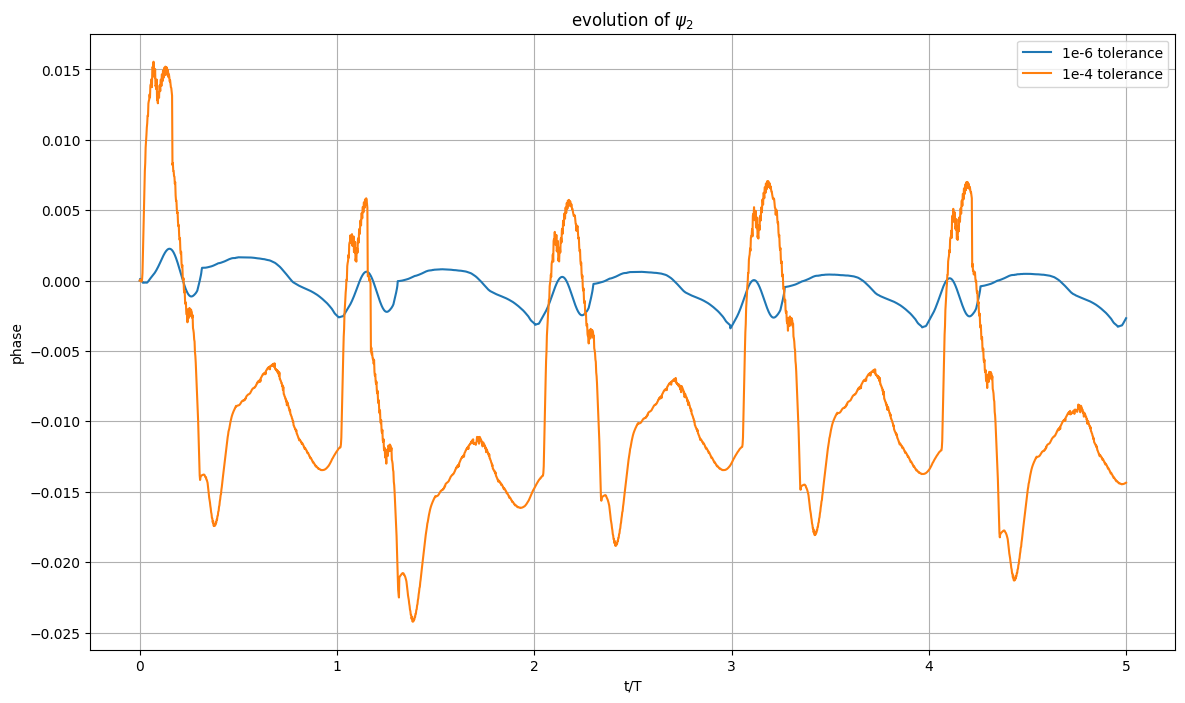

In [10]:
# List of paths to datasets that start with "new_beat"
new_beat_paths = [
  # '../../data/new_beat_avoidance_05_not_01/20250325/ciliate_1fil_100blob_8.00R_0.0010torsion_0.0000tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat',
  '../../data/gmres_tol_em6/20250401/ciliate_1fil_100blob_8.00R_0.0100torsion_0.0000tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat',
  '../../data/stiffness_em2/20250401/ciliate_1fil_100blob_8.00R_0.0100torsion_0.0000tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat'
]

# Create figure for the comparative plot
plt.figure(figsize=(14, 8))

# Load and plot each dataset
for path in new_beat_paths:

  # Load the data
  df = pd.read_csv(path, delimiter=' ', header=None)
  
  # Convert time
  df_time = df[0] /500
  
  # Plot phase (column 2)
  # plt.plot(df_time, df[2], label='psi 1')
  if 'gmres' in path:
    plt.plot(df_time, df[3], label='1e-6 tolerance')
  elif 'stiffness' in path:
    plt.plot(df_time, df[3], label='1e-4 tolerance')

# Add plot details
plt.xlabel('t/T')
plt.ylabel('phase')
plt.title(r'evolution of $\psi_2$')
plt.legend(loc='best')
plt.grid(True)

# Add horizontal reference lines
# plt.axhline(y=2*np.pi, color='k', linestyle='--', alpha=0.3, label='2π')
# plt.axhline(y=2*np.pi*0.3, color='k', linestyle='--', alpha=0.3, label='2π×0.3')

plt.show()
